# Processing CMP gathers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import CubicSpline
import warnings
warnings.filterwarnings('ignore')

## Reading (synthetic) CMP gathers

In [3]:
# Import a synthetic CMP gather - it is already stored in a compressed Numpy format
data = np.load('../data/synthetic_cmp.npz')
list(data.keys())

['dt', 'offsets', 'CMP']

In [5]:
dt = data['dt']
dt

array(0.00045678)

In [6]:
offsets = data['offsets']  
offsets

array([120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840,
       900], dtype=int64)

In [7]:
cmp = data['CMP']
cmp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.01345723, -0.01386521, -0.01440551, ..., -0.02191424,
        -0.02279523, -0.0239364 ],
       [-0.01359077, -0.01399418, -0.01453609, ..., -0.02195092,
        -0.02288917, -0.02406853],
       [-0.01371918, -0.0141151 , -0.01465338, ..., -0.02195602,
        -0.02296235, -0.02415405]])

In [8]:
num_vertical_samples = cmp.shape[0]  # The number of data points on each trace
num_vertical_samples

1200

In [9]:
num_offsets = cmp.shape[1]  # The number of traces
num_offsets

14

In [11]:
times = np.arange(num_vertical_samples)*dt  # Time axis
times

array([0.00000000e+00, 4.56783920e-04, 9.13567839e-04, ...,
       5.46770352e-01, 5.47227136e-01, 5.47683920e-01])

In [12]:
# Define a function to plot a CMP gather
def plot_cmp(cmp, num_offsets, num_vertical_samples, dt):
    """Plot a CMP gather"""
    cutoff = 0.1
    fig, ax = plt.subplots()
    ax.imshow(cmp,
               extent=[0.5, num_offsets + 0.5, dt*num_vertical_samples, 0],
               aspect='auto',
               cmap='gray',
               vmin=-cutoff,
               vmax=cutoff,
               interpolation='none')
    trace_numbers = list(range(1, num_offsets+1))  # For visual purposes
    ax.set(title='CMP', xlabel='Trace number', ylabel='Time (s)', xticks=trace_numbers);

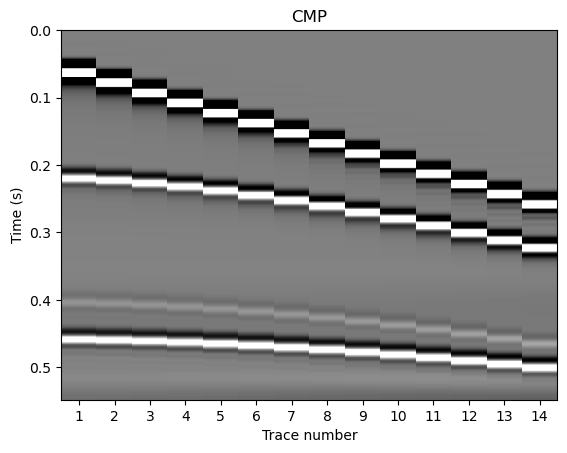

In [13]:
plot_cmp(cmp, num_offsets, num_vertical_samples, dt)

There are four reflections in the CMP gather. From top to bottom, they represent
- The direct wave
- The wave (strongly) reflected from the first interface
- A multiple reflection on the first interface
- The wave (strongly) reflected from the second interface

## NMO correction

In [14]:
# P-wave velocities and times of the two reflections
v1, t1 = 3800, 0.22
v2, t2 = 4800, 0.46